In [1]:
import pandas as pd
import rpy2
import tzlocal

import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
import matplotlib
import pandas as pd
import numpy as np

import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
pandas2ri.activate()

### please make sure you have keras and tensorflow installed.

In [72]:
import tensorflow as tf
import keras
#import tensorflow as ts
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM
from keras.callbacks import History, TensorBoard, EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam

In [41]:
readRDS = robjects.r['readRDS']
cal = readRDS('E:/cal3.rds')
cal = pandas2ri.ri2py(cal)

In [42]:
cal.shape, type(cal), cal.head()

((472, 26),
 pandas.core.frame.DataFrame,
    Month  Quarter  Weekday_No  Weekend  Holiday  HolidayWeek  TempN    Sun  \
 0    9.0      3.0         4.0      1.0      1.0          1.0   15.1  0.967   
 1    9.0      3.0         5.0      1.0      1.0          1.0   13.7  2.917   
 2    9.0      3.0         6.0      2.0      1.0          1.0   13.0  6.833   
 3    9.0      3.0         7.0      2.0      1.0          1.0   12.0  3.400   
 4    9.0      3.0         1.0      1.0      1.0          1.0   11.9  9.367   
 
    Rain  Raintype    ...      GDPoriginal   GDPx12   GDPbv4  CPIby  CPIfood  \
 0   0.4         6    ...           775.48  765.237  766.487  100.4     99.7   
 1   0.1         6    ...           775.48  765.237  766.487  100.4     99.7   
 2   0.0         6    ...           775.48  765.237  766.487  100.4     99.7   
 3   0.0         6    ...           775.48  765.237  766.487  100.4     99.7   
 4   0.0         6    ...           775.48  765.237  766.487  100.4     99.7   
 


In [43]:
cal = pd.DataFrame(cal)

In [44]:
list(cal)

['Month',
 'Quarter',
 'Weekday_No',
 'Weekend',
 'Holiday',
 'HolidayWeek',
 'TempN',
 'Sun',
 'Rain',
 'Raintype',
 'Humid',
 'Super.E10',
 'Diesel',
 'leitzins1',
 'leitzins2',
 'leitzins3',
 'GDPoriginal',
 'GDPx12',
 'GDPbv4',
 'CPIby',
 'CPIfood',
 'ClosingRate',
 'OpeningRate',
 'DailyHigh',
 'DailyLow',
 'Weight']

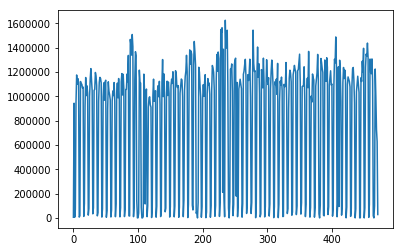

In [45]:
plt.plot(np.array(cal['Weight']))

In [46]:
cal.iloc[:,0:-2].head()

,Month,Quarter,Weekday_No,Weekend,Holiday,HolidayWeek,TempN,Sun,Rain,Raintype,...,leitzins2,leitzins3,GDPoriginal,GDPx12,GDPbv4,CPIby,CPIfood,ClosingRate,OpeningRate,DailyHigh
0,9.0,3.0,4.0,1.0,1.0,1.0,15.1,0.967,0.4,6,...,0.3,0.05,775.48,765.237,766.487,100.4,99.7,1.1419,1.1292,1.1444
1,9.0,3.0,5.0,1.0,1.0,1.0,13.7,2.917,0.1,6,...,0.3,0.05,775.48,765.237,766.487,100.4,99.7,1.1309,1.1418,1.1465
2,9.0,3.0,6.0,2.0,1.0,1.0,13.0,6.833,0.0,6,...,0.3,0.05,775.48,765.237,766.487,100.4,99.7,1.1309,1.1418,1.1465
3,9.0,3.0,7.0,2.0,1.0,1.0,12.0,3.400,0.0,6,...,0.3,0.05,775.48,765.237,766.487,100.4,99.7,1.1287,1.1283,1.1295
4,9.0,3.0,1.0,1.0,1.0,1.0,11.9,9.367,0.0,6,...,0.3,0.05,775.48,765.237,766.487,100.4,99.7,1.1190,1.1285,1.1335


# BUILD NEURAL NETWORK

In [15]:
calhist = History()

In [16]:
INPUT_SIZE = 1
OUTPUT_SIZE = 1
embedding_dim = 32
num_epochs = 10
batch_size = 256
activation_LSTM = 'sigmoid'
activation_output = 'softmax'
learning_rate = 0.001
opt = Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [73]:
calmodel = Sequential()
calmodel.add(LSTM(50, input_shape=(INPUT_SIZE,)))
calmodel.add(Dense(1))
calmodel.compile(loss='mae', optimizer='adam')

AttributeError: module 'tensorflow' has no attribute 'get_default_graph'